In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(start=-2, stop=10, num=200).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))




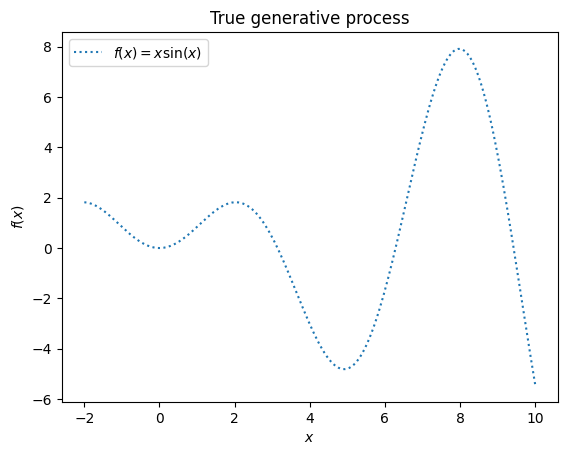

In [6]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [7]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=12, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

RBF(length_scale=0.495)

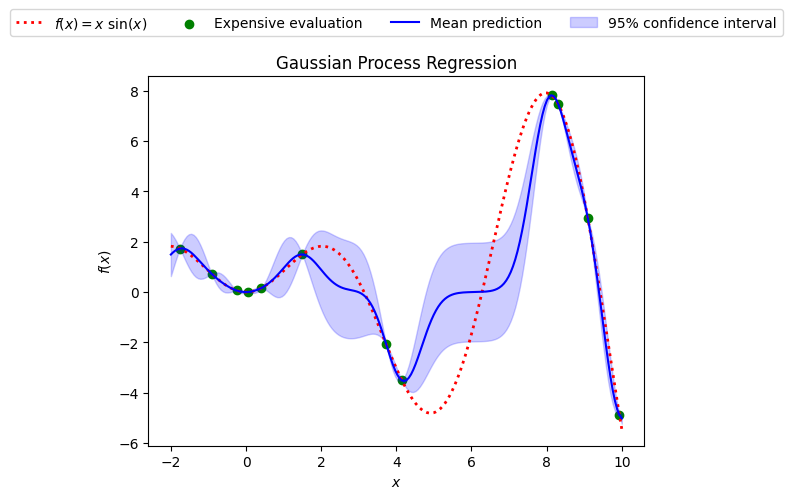

In [8]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \ \sin(x)$", linestyle="dotted", linewidth = 2, color = "red")
plt.scatter(X_train, y_train, label="Expensive evaluation", color = "green", zorder =0)
plt.plot(X, mean_prediction, label="Mean prediction", color = "blue")
plt.fill_between(X.ravel(), mean_prediction - 1.96 * std_prediction, mean_prediction + 1.96 * std_prediction, alpha=0.2, label=r"95% confidence interval", color = "blue")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncols=4)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian Process Regression")